Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.Even though this seems like a fairly straightforward task, there are so many ways you can explore, visualize, engineer your features, and tell a story with this data. It will be interesting to see the different approaches people take! 

Some important questions to think about are: how can you best explore the data? Why did you select your particular model? How did you validate your model? What insights can you derive from your results?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn import metrics
import os,sys
from scipy import stats
import numpy as np

In [2]:
bcw = pd.read_csv('bcw.txt',sep=',', header=None, na_values=["?"])
bcw.columns=["id","thickness","size","shape","adhesion","epithelialsize",\
             "barenuclei","blandchromatin","nucleoli","mitosis","diagnosis"]
bcw.describe()

,id,thickness,size,shape,adhesion,epithelialsize,barenuclei,blandchromatin,nucleoli,mitosis,diagnosis
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [3]:
# Drop rows with NaN
print len(bcw)
bcw = bcw.dropna()
print len(bcw)

699
683


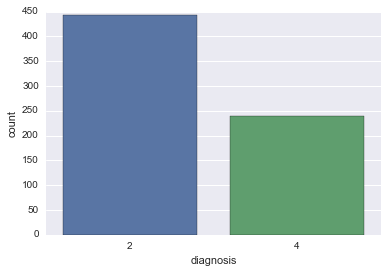

In [4]:
sns.countplot(bcw['diagnosis'],label="Count")

In [5]:
bcw.dtypes
bcw.barenuclei = bcw.barenuclei.apply(lambda x:int(x))
bcw.dtypes

id                int64
thickness         int64
size              int64
shape             int64
adhesion          int64
epithelialsize    int64
barenuclei        int64
blandchromatin    int64
nucleoli          int64
mitosis           int64
diagnosis         int64
dtype: object

In [6]:
# features= list(bcw.columns[1:5])
features = bcw.columns[1:11].tolist()
features

['thickness',
 'size',
 'shape',
 'adhesion',
 'epithelialsize',
 'barenuclei',
 'blandchromatin',
 'nucleoli',
 'mitosis',
 'diagnosis']

In [7]:
# split dataframe into two based on diagnosis
class_M = bcw[bcw['diagnosis'] ==4]
class_B = bcw[bcw['diagnosis'] ==2]

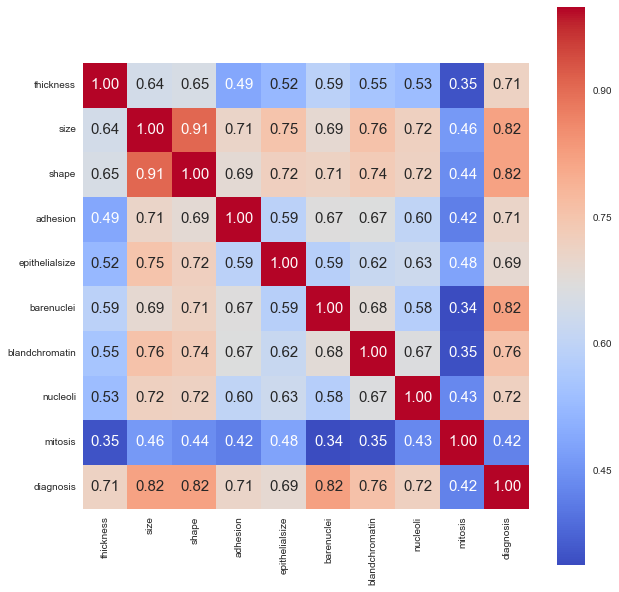

In [8]:
# Determine the correlation between features. 
corr = bcw[features].corr() # .corr is used for find corelation
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features,cmap= 'coolwarm')

In [9]:
# Since size and shape are highly correlated, we can drop shape feature in favor or size.
input_features = ["thickness","size","adhesion","epithelialsize","barenuclei","blandchromatin","nucleoli","mitosis"]

In [10]:
# Split the dataset into training and testing subsets.
train,test = train_test_split(bcw, test_size = 0.25)
print(train.shape)
print(test.shape)

(512, 11)
(171, 11)


In [11]:
train_X = train[input_features] # taking the training data input 
train_y=train.diagnosis         # This is output of our training data
test_X= test[input_features]    # taking test data inputs
test_y =test.diagnosis

In [120]:
train_X.head()

,thickness,size,adhesion,epithelialsize,barenuclei,blandchromatin,nucleoli,mitosis
485,1,1,3,1,3,1,1,1
499,4,1,1,2,1,2,1,1
479,4,8,10,4,10,7,5,1
171,1,1,1,2,1,3,1,1
201,10,8,4,10,10,8,1,1


In [12]:
RF_model=RandomForestClassifier(n_estimators=100)   

In [13]:
RF_model.fit(train_X,train_y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
pred_y_RF=RF_model.predict(test_X)   # predict for the test data

In [15]:
metrics.accuracy_score(pred_y_RF,test_y)

0.95906432748538006

In [19]:
SVM_model = svm.SVC(probability=True)
SVM_model.fit(train_X,train_y)
pred_y_SVM=SVM_model.predict(test_X)
print metrics.accuracy_score(pred_y_SVM,test_y)

from sklearn import metrics
print(metrics.classification_report(test_y, pred_y_SVM))
print "Confusion Matrix"
print metrics.confusion_matrix(test_y, pred_y_SVM)

0.93567251462
             precision    recall  f1-score   support

          2       1.00      0.90      0.95       110
          4       0.85      1.00      0.92        61

avg / total       0.95      0.94      0.94       171

Confusion Matrix
[[99 11]
 [ 0 61]]


## ---------------------------------------------------------------------------------------